In [1]:
!poetry add openpyxl

The following packages are already present in the pyproject.toml and will be skipped:

  - openpyxl

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [2]:
import pandas as pd
from IPython.display import display

# Path to SH_H20_SAFE Excel file
h2O_file_path = './Dataset/SH_H2O_SAFE.xlsx'

# Read the names of the sheets in the Excel file
h2O_xls = pd.ExcelFile(h2O_file_path)
h2O_sheet_names = h2O_xls.sheet_names
h2O_sheet_names

['Table format', 'Record format', 'CodeDescriptions']

In [3]:
h2O_table = pd.read_excel(h2O_file_path, sheet_name=['Table format'])
table_format = h2O_table['Table format']
table_format.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Location,Reporting Type,Units,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,6,6.1,6.1.1,SH_H2O_SAFE,Proportion of population using safely managed ...,4,Afghanistan,ALLAREA,G,PERCENT,...,22.03447,22.94430,23.85359,24.76222,25.67142,26.58131,27.49173,28.40251,29.31384,30.03410
1,6,6.1,6.1.1,SH_H2O_SAFE,Proportion of population using safely managed ...,4,Afghanistan,RURAL,G,PERCENT,...,19.36433,20.29407,21.22380,22.15354,23.08328,24.01301,24.94275,25.87249,26.80222,27.73196
2,6,6.1,6.1.1,SH_H2O_SAFE,Proportion of population using safely managed ...,4,Afghanistan,URBAN,G,PERCENT,...,30.31965,31.07307,31.82649,32.57991,33.33334,34.08676,34.84018,35.59360,36.34703,36.38141
3,6,6.1,6.1.1,SH_H2O_SAFE,Proportion of population using safely managed ...,8,Albania,ALLAREA,G,PERCENT,...,68.45983,70.56326,70.59197,70.61651,70.63694,70.65335,70.66586,70.67454,70.70580,70.73607
4,6,6.1,6.1.1,SH_H2O_SAFE,Proportion of population using safely managed ...,12,Algeria,ALLAREA,G,PERCENT,...,76.25014,76.61823,76.97196,76.39486,75.73054,75.03613,73.95388,72.24815,70.54703,70.59793


In [4]:
table_format['GeoAreaName'].nunique()

198

In [5]:
locations_of_interest = ['ALLAREA', 'RURAL', 'URBAN']
location_df = table_format[table_format['Location'].isin(locations_of_interest)]
location_df['Location'].value_counts()

Location
ALLAREA    180
URBAN      131
RURAL      102
Name: count, dtype: int64

In [6]:
# data we have on Afghanistan, for the years 2000-2022
afghanistan_df = table_format[(table_format['GeoAreaName'] == 'Afghanistan')]
display(afghanistan_df)
# columns within the range of 2000 to 2022
cols = [str(year) for year in range(2000, 2023)]
columns_2000_2022 = [col for col in afghanistan_df.columns if col in cols]

afghanistan_df[['Location', *columns_2000_2022]]

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Location,Reporting Type,Units,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,6,6.1,6.1.1,SH_H2O_SAFE,Proportion of population using safely managed ...,4,Afghanistan,ALLAREA,G,PERCENT,...,22.03447,22.94430,23.85359,24.76222,25.67142,26.58131,27.49173,28.40251,29.31384,30.03410
1,6,6.1,6.1.1,SH_H2O_SAFE,Proportion of population using safely managed ...,4,Afghanistan,RURAL,G,PERCENT,...,19.36433,20.29407,21.22380,22.15354,23.08328,24.01301,24.94275,25.87249,26.80222,27.73196
2,6,6.1,6.1.1,SH_H2O_SAFE,Proportion of population using safely managed ...,4,Afghanistan,URBAN,G,PERCENT,...,30.31965,31.07307,31.82649,32.57991,33.33334,34.08676,34.84018,35.59360,36.34703,36.38141


,Location,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ALLAREA,11.09333,11.10522,12.00773,12.90992,13.81868,14.73385,15.64843,16.56252,17.47601,...,22.03447,22.94430,23.85359,24.76222,25.67142,26.58131,27.49173,28.40251,29.31384,30.03410
1,RURAL,8.20749,8.20749,9.13723,10.06696,10.99670,11.92644,12.85617,13.78591,14.71565,...,19.36433,20.29407,21.22380,22.15354,23.08328,24.01301,24.94275,25.87249,26.80222,27.73196
2,URBAN,21.27858,21.27858,22.03200,22.78542,23.53885,24.29227,25.04569,25.79911,26.55254,...,30.31965,31.07307,31.82649,32.57991,33.33334,34.08676,34.84018,35.59360,36.34703,36.38141


In [7]:
# Path to your Excel file
file_path = './Dataset//SDG_10_7_3.xlsx'

# Read the names of the sheets in the Excel file
sdg_xls = pd.ExcelFile(file_path)
sheet_names = sdg_xls.sheet_names
sheet_names

['CodeDescriptions', 'Goal10', 'Pivot Table 5']

In [8]:
# Read all sheets into a dictionary of dataframes
sheets = pd.read_excel(file_path, sheet_name=['CodeDescriptions', 'Goal10'])

# Access data from specific sheets
for sheet_name, df in sheets.items():
    print(f"\nData from sheet: {sheet_name}")
    display(df.head())


Data from sheet: CodeDescriptions


,Dimension,Code,Description
0,Nature,G,Global monitoring data
1,Nature,N,Non-relevant
2,Reporting Type,G,Global
3,Units,NUMBER,Number



Data from sheet: Goal10


,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,.10,.11,.12,.13,.14,.15,.16,.17,.18,.19
0,10,10.7,10.7.3,SM_DTH_MIGR,Total deaths and disappearances recorded durin...,1,World,2014,5548,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,10.7,10.7.3,SM_DTH_MIGR,Total deaths and disappearances recorded durin...,1,World,2015,6750,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,10.7,10.7.3,SM_DTH_MIGR,Total deaths and disappearances recorded durin...,1,World,2016,8084,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,10.7,10.7.3,SM_DTH_MIGR,Total deaths and disappearances recorded durin...,1,World,2017,6290,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,10.7,10.7.3,SM_DTH_MIGR,Total deaths and disappearances recorded durin...,1,World,2018,5009,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
goal_data = sheets['Goal10'][['GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail']]
goal_data

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail
0,1,World,2014,5548,2014
1,1,World,2015,6750,2015
2,1,World,2016,8084,2016
3,1,World,2017,6290,2017
4,1,World,2018,5009,2018
...,...,...,...,...,...
859,887,Yemen,2022,670,2022
860,887,Yemen,2023,440,2023
861,894,Zambia,2016,24,2016
862,894,Zambia,2018,9,2018


In [10]:
goal_data.groupby('GeoAreaName')['GeoAreaName'].count().sort_values().nlargest(30)

GeoAreaName
Algeria                            10
Iran (Islamic Republic of)         10
Tunisia                            10
Northern America                   10
Northern Africa                    10
Greece                             10
Europe                             10
Italy                              10
Western Asia                       10
Eastern Africa                     10
Dominican Republic                 10
Eastern Europe                     10
France                             10
South-Eastern Asia                 10
Somalia                            10
Southern Asia                      10
Spain                              10
World                              10
Libya                              10
Djibouti                           10
Sub-Saharan Africa                 10
Caribbean                          10
Latin America and the Caribbean    10
Türkiye                            10
United States of America           10
Western Europe                     10


In [11]:
goal_data['GeoAreaName'].value_counts().nlargest(15)

GeoAreaName
World                 10
Tunisia               10
Türkiye               10
Caribbean             10
Northern America      10
South-Eastern Asia    10
Southern Asia         10
Spain                 10
Somalia               10
Thailand              10
Sub-Saharan Africa    10
Dominican Republic    10
Central America       10
Italy                 10
Western Europe        10
Name: count, dtype: int64

In [12]:
df = goal_data
# Step 1: Filter data for the period 2018-2023
filtered_df = df[(df['TimePeriod'] >= 2018) & (df['TimePeriod'] <= 2023)]

# Step 2: Group by GeoAreaName and calculate the average deaths and disappearances
geoarea_avg = filtered_df.groupby('GeoAreaName')['Value'].mean()

# Step 3: Extract the World average
world_avg = geoarea_avg['World']

# Step 4: Calculate the proportion of each GeoAreaName's average relative to the World average
proportions = geoarea_avg / world_avg

# Step 5: remove world from the averages since it is a sum of all
proportions = proportions.drop('World')

# Step 5: Determine the GeoAreaName with the largest proportion
largest_share = proportions.idxmax()
largest_proportion = proportions.max()

print(f"The top 3 largest share is:")
display(proportions.nlargest(3))
print(f"\nThe GeoAreaName with the largest share is: {largest_share}\n")
print(f"The largest proportion is: {largest_proportion}")

The top 3 largest share is:


GeoAreaName
Libya                              0.187459
Sub-Saharan Africa                 0.088761
Latin America and the Caribbean    0.085836
Name: Value, dtype: float64


The GeoAreaName with the largest share is: Libya

The largest proportion is: 0.18745860013247956


GeoAreaName,Eastern Africa,Eastern Europe,Northern Africa,Northern America,Northern Europe
TimePeriod,,,,,
2014,322.0,4.0,61.0,530.0,4.0
2015,198.0,6.0,733.0,305.0,8.0
2016,247.0,16.0,1237.0,352.0,2.0
2017,131.0,15.0,987.0,348.0,1.0
2018,252.0,1.0,646.0,381.0,1.0
2019,69.0,2.0,855.0,419.0,46.0
2020,168.0,9.0,131.0,369.0,NaN
2021,149.0,31.0,344.0,592.0,1.0
2022,90.0,58.0,574.0,569.0,5.0


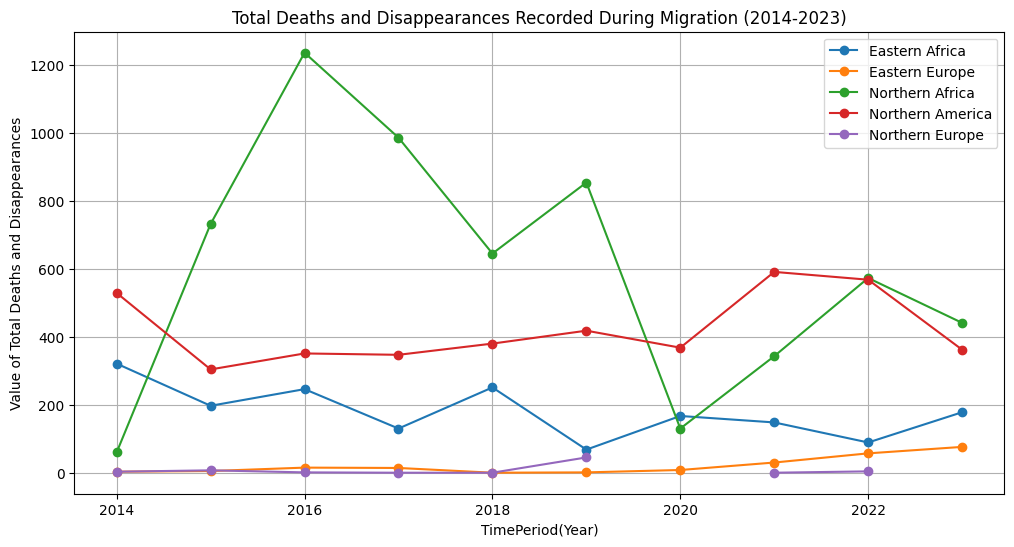

GeoAreaName
Eastern Africa      -99.0
Eastern Europe       -7.0
Northern Africa     724.0
Northern America     50.0
Northern Europe       NaN
dtype: float64

The region with the sharpest decline in 2020 is: Northern Africa
The sharpest decline value is: 724.0


In [13]:
import matplotlib.pyplot as plt

# Filter the data for the specified regions and time period (2014-2023)
regions_of_interest = ['Eastern Africa', 'Eastern Europe', 'Northern Africa', 'Northern America', 'Northern Europe']
filtered_df = goal_data[(goal_data['GeoAreaName'].isin(regions_of_interest)) & (goal_data['TimePeriod'].between(2014, 2023))]

# Pivot the data to have years as rows and GeoAreaName as columns
pivot_df = filtered_df.pivot_table(index='TimePeriod', columns='GeoAreaName', values='Value', aggfunc='sum')
display(pivot_df)

# Plot the line graph
plt.figure(figsize=(12, 6))
for region in regions_of_interest:
    plt.plot(pivot_df.index, pivot_df[region], marker='o', label=region)

plt.xlabel('TimePeriod(Year)')
plt.ylabel('Value of Total Deaths and Disappearances')
plt.title('Total Deaths and Disappearances Recorded During Migration (2014-2023)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the decline in 2020 for each region
decline_2020 = pivot_df.loc[2019] - pivot_df.loc[2020]
display(decline_2020)

# Identify the region with the sharpest decline in 2020
sharpest_decline_region = decline_2020.idxmax()
sharpest_decline_value = decline_2020.max()

print(f"The region with the sharpest decline in 2020 is: {sharpest_decline_region}")
print(f"The sharpest decline value is: {sharpest_decline_value}")

In [14]:
# Filter the data for the year 2020 and exclude the "World" entry
df = goal_data
filtered_2020_df = df[(df['TimePeriod'] == 2020) & (df['GeoAreaName'] != 'World')]

# Extract the value for Total deaths and disappearances recorded during migration
data_2020 = filtered_2020_df['Value']

# Calculate the interquartile range (IQR)
Q1 = data_2020.quantile(0.25)
Q3 = data_2020.quantile(0.75)
IQR = Q3 - Q1

print(f"The Interquartile Range (IQR) for the year 2020 (excluding 'World') is: {IQR}")

The Interquartile Range (IQR) for the year 2020 (excluding 'World') is: 123.0


In [15]:
north_african_countries = ['Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia', 'Western Sahara']
df = goal_data
northern_df = df[df['GeoAreaName'].isin(north_african_countries)]
northern_df.groupby('GeoAreaName')['Value'].sum()

GeoAreaName
Algeria            2033
Egypt              1415
Libya             19949
Morocco            2581
Sudan              1190
Tunisia            2539
Western Sahara     1189
Name: Value, dtype: int64